**Guage Chart**

SRC:
https://www.r-bloggers.com/2013/01/gauge-chart-in-r/


In [2]:
# function to create a circle
circle <- function(center=c(0,0), radius=1, npoints=100)
{
  r = radius
  tt = seq(0, 2*pi, length=npoints)
  xx = center[1] + r * cos(tt)
  yy = center[1] + r * sin(tt)
  return(data.frame(x = xx, y = yy))
}

# function to get slices
slice2xy <- function(t, rad) 
{
  t2p = -1 * t * pi + 10*pi/8
  list(x = rad * cos(t2p), y = rad * sin(t2p))
}

# function to get major and minor tick marks
ticks <- function(center=c(0,0), from=0, to=2*pi, radius=0.9, npoints=5)
{
  r = radius
  tt = seq(from, to, length=npoints)
  xx = center[1] + r * cos(tt)
  yy = center[1] + r * sin(tt)
  return(data.frame(x = xx, y = yy))
}

In [23]:
# external circle (this will be used for the black border)
border_cir = circle(c(0,0), radius=1, npoints = 100)

# gray border circle
external_cir = circle(c(0,0), radius=0.97, npoints = 100)

# yellow slice (this will be used for the yellow band)
yellowFrom = 75
yellowTo = 90
yel_ini = (yellowFrom/100) * (12/8)
yel_fin = (yellowTo/100) * (12/8)
Syel = slice2xy(seq.int(yel_ini, yel_fin, length.out = 30), rad=0.9)

# red slice (this will be used for the red band)
redFrom = 90
redTo = 100
red_ini = (redFrom/100) * (12/8)
red_fin = (redTo/100) * (12/8)
Sred = slice2xy(seq.int(red_ini, red_fin, length.out = 30), rad=0.9)

# white slice (this will be used to get the yellow and red bands)
whiteFrom = 74
whiteTo = 101
white_ini = (whiteFrom/100) * (12/8)
white_fin = (whiteTo/100) * (12/8)
Swhi = slice2xy(seq.int(white_ini, white_fin, length.out = 30), rad=0.8)

# coordinates of major ticks (will be plotted as arrows)
major_ticks_out = ticks(c(0,0), from=5*pi/4, to=-pi/4, radius=0.9, 5)
major_ticks_in = ticks(c(0,0), from=5*pi/4, to=-pi/4, radius=0.75, 5)

# coordinates of minor ticks (will be plotted as arrows)
tix1_out = ticks(c(0,0), from=5*pi/4, to=5*pi/4-3*pi/8, radius=0.9, 6)
tix2_out = ticks(c(0,0), from=7*pi/8, to=7*pi/8-3*pi/8, radius=0.9, 6)
tix3_out = ticks(c(0,0), from=4*pi/8, to=4*pi/8-3*pi/8, radius=0.9, 6)
tix4_out = ticks(c(0,0), from=pi/8, to=pi/8-3*pi/8, radius=0.9, 6)
tix1_in = ticks(c(0,0), from=5*pi/4, to=5*pi/4-3*pi/8, radius=0.85, 6)
tix2_in = ticks(c(0,0), from=7*pi/8, to=7*pi/8-3*pi/8, radius=0.85, 6)
tix3_in = ticks(c(0,0), from=4*pi/8, to=4*pi/8-3*pi/8, radius=0.85, 6)
tix4_in = ticks(c(0,0), from=pi/8, to=pi/8-3*pi/8, radius=0.85, 6)

# coordinates of min and max values (0, 100)
v0 = -1 * 0 * pi + 10*pi/8
z0x = 0.65 * cos(v0)
z0y = 0.65 * sin(v0)
v100 = -1 * 12/8 * pi + 10*pi/8
z100x = 0.65 * cos(v100)
z100y = 0.65 * sin(v100)

# indicated value, say 80 (you can choose another number between 0-100)
value = 16

# angle of needle pointing to the specified value
val = (value/100) * (12/8)
v = -1 * val * pi + 10*pi/8
# x-y coordinates of needle
val_x = 0.7 * cos(v)
val_y = 0.7 * sin(v)

# label to be displayed
label = "KR"

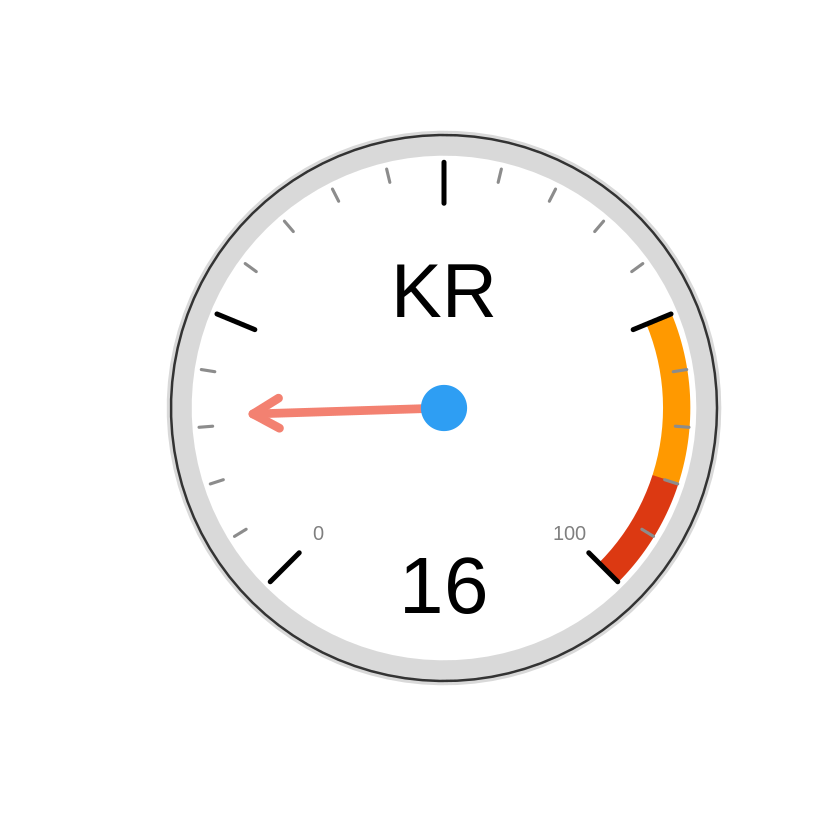

In [24]:
# open plot
plot(border_cir$x, border_cir$y, type="n", asp=1, axes=FALSE,
     xlim=c(-1.05,1.05), ylim=c(-1.05,1.05),
     xlab="", ylab="")
# yellow slice
polygon(c(Syel$x, 0), c(Syel$y, 0),
        border = "#FF9900", col = "#FF9900", lty = NULL)
# red slice
polygon(c(Sred$x, 0), c(Sred$y, 0),
        border = "#DC3912", col = "#DC3912", lty = NULL)
# white slice
polygon(c(Swhi$x, 0), c(Swhi$y, 0),
        border = "white", col = "white", lty = NULL)
# add gray border
lines(external_cir$x, external_cir$y, col="gray85", lwd=20)
# add external border
lines(border_cir$x, border_cir$y, col="gray20", lwd=2)
# add minor ticks
arrows(x0=tix1_out$x, y0=tix1_out$y, x1=tix1_in$x, y1=tix1_in$y,
       length=0, lwd=2.5, col="gray55")
arrows(x0=tix2_out$x, y0=tix2_out$y, x1=tix2_in$x, y1=tix2_in$y,
        length=0, lwd=2.5, col="gray55")
arrows(x0=tix3_out$x, y0=tix3_out$y, x1=tix3_in$x, y1=tix3_in$y,
       length=0, lwd=2.5, col="gray55")
arrows(x0=tix4_out$x, y0=tix4_out$y, x1=tix4_in$x, y1=tix4_in$y,
       length=0, lwd=2.5, col="gray55")
# add major ticks
arrows(x0=major_ticks_out$x, y0=major_ticks_out$y,
       x1=major_ticks_in$x, y1=major_ticks_in$y, length=0, lwd=4)
# add value
text(0, -0.65, value, cex=4)
# add label of variable
text(0, 0.43, label, cex=3.8)
# add needle
arrows(0, 0, val_x, val_y, col="#f38171", lwd=7)
# add central blue point
points(0, 0, col="#2e9ef3", pch=19, cex=5)
# add values 0 and 100
text(z0x, z0y, labels="0", col="gray50")
text(z100x, z100y, labels="100", col="gray50")

In [8]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
df <- data.frame(matrix(nrow=5, ncol = 2))

names(df) <- c("variable", "percentage")
df$variable <- c("Carbohydrates", "Warming", "NGTnotPresent", "DrainNotPresent", "DrEaMing")
df$percentage <- c(0.67,0.33,0.86,0.78,0.58)

df <- df %>% mutate(group=ifelse(percentage <0.6, "red",
 ifelse(percentage>=0.6 & percentage<0.8, "orange","green")),
 label=paste0(percentage*100, "%"),
 title=dplyr::recode(variable, `Carbohydrates`="Preoperative\ncarbohydrate loading",
 `Warming`="Intraoperative\nwarming",
 `NGTnotPresent`="Patients without a\nnasogastric tube\non arrival in recovery",
 `DrainNotPresent`="Patients without an\nabdominal drain\non arrival in recovery",
 `DrEaMing`="Patients DrEaMing on\npostoperative day 1"))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


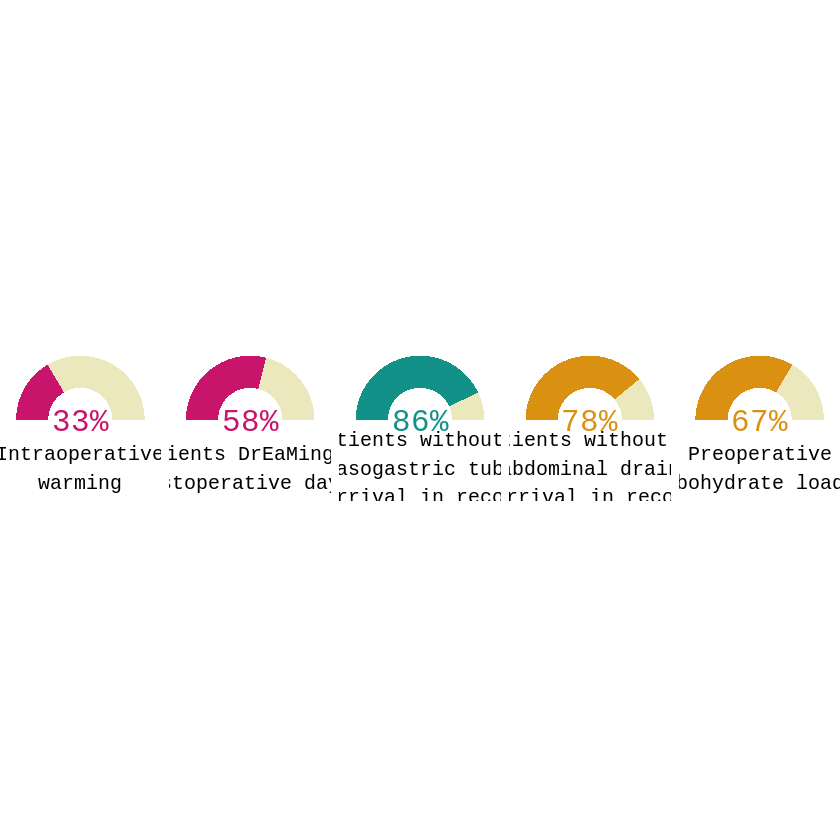

In [11]:
ggplot(df, aes(fill = group, ymax = percentage, ymin = 0, xmax = 2, xmin = 1)) +
 geom_rect(aes(ymax=1, ymin=0, xmax=2, xmin=1), fill ="#ece8bd") +
 geom_rect() + 
 coord_polar(theta = "y",start=-pi/2) + xlim(c(0, 2)) + ylim(c(0,2)) +
 geom_text(aes(x = 0, y = 0, label = label, colour=group), size=6.5, family="Poppins SemiBold") +
 geom_text(aes(x=1.5, y=1.5, label=title), family="Poppins Light", size=4.2) + 
 facet_wrap(~title, ncol = 5) +
 theme_void() +
 scale_fill_manual(values = c("red"="#C9146C", "orange"="#DA9112", "green"="#129188")) +
 scale_colour_manual(values = c("red"="#C9146C", "orange"="#DA9112", "green"="#129188")) +
 theme(strip.background = element_blank(),
 strip.text.x = element_blank()) +
 guides(fill=FALSE) +
 guides(colour=FALSE)

In [12]:
df <- data.frame(matrix(nrow=1, ncol = 2))

names(df) <- c("variable", "percentage")
df$variable <- c("KR-1")
df$percentage <- c(0.67)

df <- df %>% mutate(group=ifelse(percentage <0.6, "red",
 ifelse(percentage>=0.6 & percentage<0.8, "orange","green")),
 label=paste0(percentage*100, "%"))

In [14]:
head(df)

,variable,percentage,group,label
,<chr>,<dbl>,<chr>,<chr>
1,KR-1,0.67,orange,67%


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `title`.
* Plot is missing `title`
* Layer 1 is missing `title`
* Layer 2 is missing `title`
* Layer 3 is missing `title`
* Layer 4 is missing `title`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler

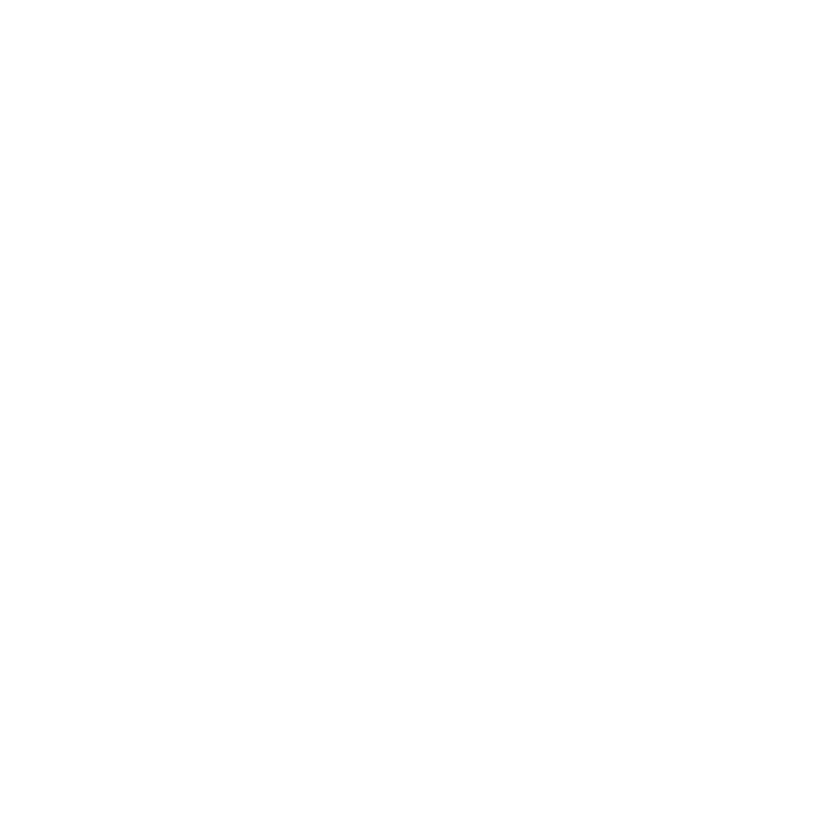

In [15]:
ggplot(df, aes(fill = group, ymax = percentage, ymin = 0, xmax = 2, xmin = 1)) +
 geom_rect(aes(ymax=1, ymin=0, xmax=2, xmin=1), fill ="#ece8bd") +
 geom_rect() + 
 coord_polar(theta = "y",start=-pi/2) + xlim(c(0, 2)) + ylim(c(0,2)) +
 geom_text(aes(x = 0, y = 0, label = label, colour=group), size=6.5, family="Poppins SemiBold") +
 geom_text(aes(x=1.5, y=1.5, label=title), family="Poppins Light", size=4.2) + 
 facet_wrap(~title, ncol = 5) +
 theme_void() +
 scale_fill_manual(values = c("red"="#C9146C", "orange"="#DA9112", "green"="#129188")) +
 scale_colour_manual(values = c("red"="#C9146C", "orange"="#DA9112", "green"="#129188")) +
 theme(strip.background = element_blank(),
 strip.text.x = element_blank()) +
 guides(fill=FALSE) +
 guides(colour=FALSE)